Imports

In [3]:
%matplotlib inline
from actincme.bin.symmetricize import Symmetricize
from actincme.bin.rotate import Rotate, AverageRotate
from actincme.bin.filament import Filament
from actincme.bin.mypyntcloud import MyPyntCloud
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import os
# import pyvista as pv
import matplotlib.pyplot as plt

If needed, choose slices that have been manually determined to be good

In [ ]:
# manually determined slices
start_list = [1, 4, 4, 4, 5, 6, 5, 6, 5, 6, 2, 4, 5, 3, 6, 7, 1, 4, 1, 2, 1, 5, 1, 1, 1, 0, 1]
end_list = [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -3, -1, -1, -1, -1, -1, -1, -2, -1, -2, -1]


Choose which folder to analyze
also include which slice to rotate and symmetricise. this is the "key slice"

In [107]:

# membrane_path = '../actincme/pkl_files/'
# membrane_path = '../PolarityAnalysis/2018August_Tomo27/'

# membrane_path = '../PolarityAnalysis/2018_April_Tomo01/'
# key_slice = 16

# membrane_path = '../PolarityAnalysis/2018June_Tomo14_Early_Invagination/'
# membrane_path = '../PolarityAnalysis/2018June_Tomo14_Late_Invagination/'

# membrane_path = '../PolarityAnalysis/2018June_Tomo26/'
# key_slice = 10

# membrane_path = '../PolarityAnalysis/2018March/'
# key_slice = 5

membrane_path = '../PolarityAnalysis/2018November_32/'
key_slice = 5


Choose a single membrane contour, symmetricize and rotate it

/Volumes/GoogleDrive/My Drive/Akamatsu et al 2018 actin endocytosis/Actin cortex project/actincme/actincme/bin/symmetricize.py:61: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


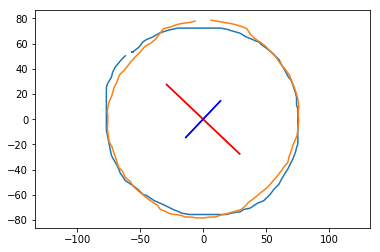

In [108]:
i = key_slice
#  symmetriccize contour "i" and cut off points according to the list above
# shape = Symmetricize(membrane_path, i+1, start_list[i], end_list[i])

#  symmetriccize contour "i" and keep all points
shape = Symmetricize(membrane_path, i+1, 1,-1)


# This returns normalized data
this_x, this_y, this_z = shape.do_everything_2d("fit", plot=True) #handles all the logic in symmetricizing fit curves
# can renormalize by
mean_x, mean_y = shape.get_mean_coords()
# Rotate this slice around z
this_rotate = Rotate(this_x, this_y, this_z, mean_x, mean_y)
test_x, test_y, test_z = this_rotate.rotate_steps()

find the file name for branched or unbranched filaments

In [109]:
# branched filaments file
branched_filaments_file = []
unbranched_filaments_file = []
files_in_dir = os.listdir(membrane_path)
for file in files_in_dir:
    if 'Branched' in file and 'txt' in file:
        branched_filaments_file = file

for file in files_in_dir:
    if 'Unbranched' in file and 'txt' in file:
        unbranched_filaments_file = file

branched_filaments_file

'BranchedActin_TomoNovember_32_Vesicle.txt'

Plot filament orientation relative to this, directions can be "ydir", "zdir", or "ydir_rel", "zdir_rel" or "normal_angle"

/Volumes/GoogleDrive/My Drive/Akamatsu et al 2018 actin endocytosis/Actin cortex project/actincme/actincme/bin/filament.py:26: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  coords_df = pd.read_table(f, delim_whitespace=True)
/Volumes/GoogleDrive/My Drive/Akamatsu et al 2018 actin endocytosis/Actin cortex project/actincme/actincme/bin/filament.py:148: RuntimeWarning: invalid value encountered in arcsin
  ydir = np.degrees(np.arcsin(deltayy/fil_length))


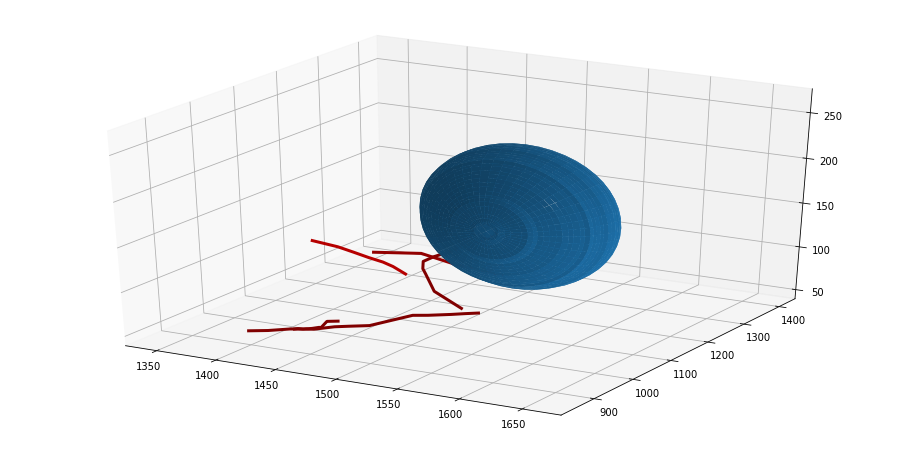

In [110]:
fig = plt.figure(figsize=[16,8])
ax=fig.add_subplot(111, projection='3d')

# filaments = Filament('../Notebooks/', 'BranchedActinCoordinates_Integers')
filaments = Filament(membrane_path, branched_filaments_file[:-4])

# for unbranched filaments
# filaments = Filament(membrane_path, unbranched_filaments_file[:-4])


# Compute directionality of filaments
filaments.calculate_directionality(rotated_surface=this_rotate) #handles all the logic 
# Plot the filaments
filaments.plot_filaments_and_shape(1, fig, ax, this_rotate, direction='normal_angle')

Take a look at the filament dataframe

In [111]:
filaments._filament_orientation_dataframe

,filament_ID,ydir,zdir,normal_angle,length,x_coords,y_coords,z_coords
0,1,78.396987,-7.600318,126.936873,241.944208,"[1486, 1454, 1439, 1431, 1423, 1424, 1430, 143...","[1169, 1196, 1219, 1236, 1261, 1285, 1320, 136...","[44, 52, 65, 66, 68, 69, 71, 74, 76]"
1,11,-53.461080,-6.921993,70.826371,248.925692,"[1346, 1380, 1402, 1428, 1446, 1464, 1494]","[1206, 1172, 1147, 1110, 1092, 1064, 1006]","[88, 94, 97, 103, 105, 109, 118]"
2,12,13.531037,6.448298,83.275165,106.850363,"[1419, 1456, 1483, 1523]","[1148, 1158, 1165, 1173]","[100, 104, 95, 88]"
3,25,12.934674,20.344645,127.113413,209.971427,"[1602, 1590, 1578, 1557, 1543, 1504, 1485, 147...","[857, 861, 864, 872, 877, 888, 894, 897, 899, ...","[127, 123, 119, 112, 108, 86, 80, 76, 69, 65, ..."
4,26,NaN,7.634467,93.498660,112.907041,"[1433, 1432, 1432, 1431, 1430, 1428, 1427, 142...","[912, 923, 935, 945, 954, 968, 987, 995, 1009,...","[62, 60, 57, 55, 53, 50, 47, 45, 49, 49, 47]"


Save as a csv file

In [112]:
filaments._filament_orientation_dataframe.to_csv(membrane_path+'filament_orientations.csv')

# The rest can be ignored its for looking at the 3D membrane and calculating curvatures

Attempting to use the pointcloud package to compute curvatures along a shape

In [10]:
dim_x = this_rotate._x3d_norm
dim_y = this_rotate._y3d_norm
dim_z = this_rotate._z3d_norm
pyntobj = MyPyntCloud(dim_x, dim_y, dim_z)
pyntobj.make_cloud_object()
pyntobj.compute_scalars(num_of_neighbours=3)


PyntCloud
324 points with 7 scalar fields
0 faces in mesh
1 kdtrees
0 voxelgrids
Centroid: 1058.1213296629965, 697.5555555555555, 109.68571428571428
Other attributes:

In [11]:
fig = plt.figure(figsize=[10,8])
ax=fig.add_subplot(111, projection='3d')
pyntobj.plot_curve(fig, ax, save=True, label='curvature(4)')


In [12]:
fig = plt.figure(figsize=[10,8])
ax=fig.add_subplot(111, projection='3d')
pyntobj.plot_curve(fig, ax, save=True, name_of_file='normal', label='ny(4)')

Pyntcloud can convert their object into a PyVista mesh

In [14]:
converted_triangle_mesh = pyntobj._actual_pyntcloud_object.to_instance("pyvista", mesh=True)

In [15]:
converted_triangle_mesh

PolyData (0x139a4d210)
  N Cells:	324
  N Points:	324
  X Bounds:	9.404e+02, 1.171e+03
  Y Bounds:	5.440e+02, 8.530e+02
  Z Bounds:	-6.317e+00, 2.257e+02
  N Arrays:	7

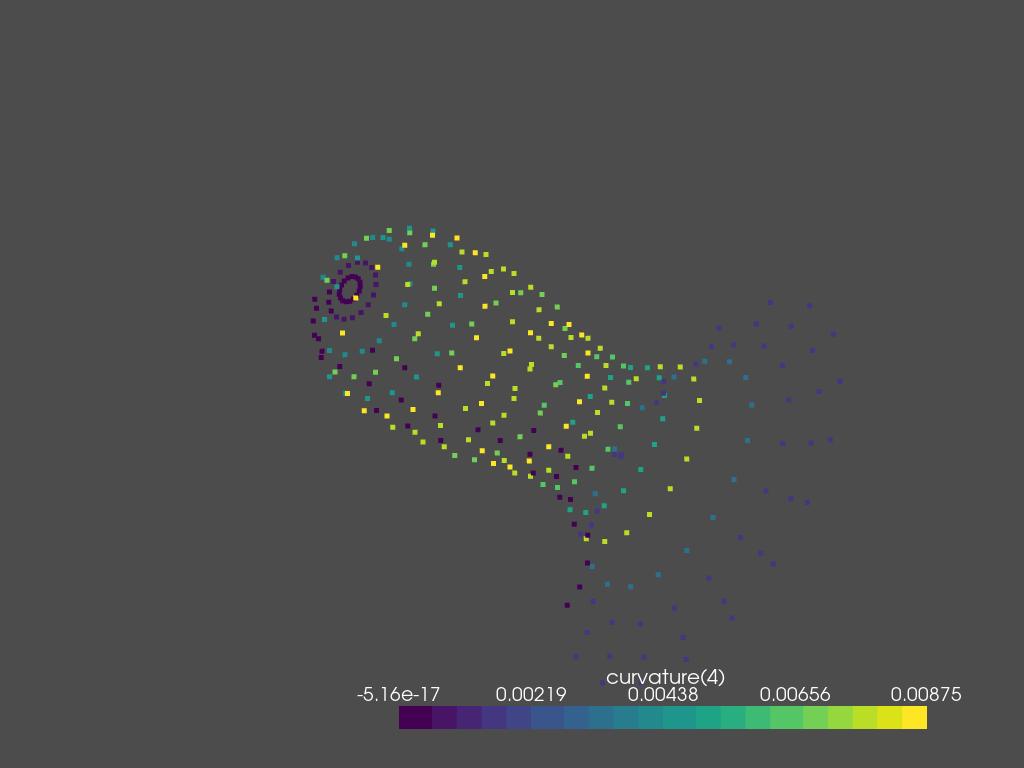

In [16]:
# Heres how bad the curvature looks
converted_triangle_mesh.plot(scalars="curvature(4)", categories=True, show_edges=True)